## Artist tutorial

Using Artist objects to render on the canvas.

There are three layers to the matplotlib API.

1. the matplotlib.backend_bases.__FigureCanvas__ is the area onto which the figure is drawn
2. the matplotlib.backend_bases.__Renderer__ is the object which knows how to draw on the FigureCanvas
3. the matplotlib.artist.__Artist__ is the object that knows how to use a renderer to paint onto the canvas.


The FigureCanvas and Renderer handle all the details of talking to user interface toolkits like wxPython or drawing languages like PostScript®

There are two types of Artists: 
   1.  __primitives__ are the standard graphical objects will be to painted onto the canvas: Line2D, Rectangle, Text, AxesImage
   2. __containers.__ are places to put them (Axis, Axes and Figure)

matplotlib.pyplot.figure() instantiates Figure instances and connecting them with user interface or drawing toolkit FigureCanvas. The Figure to create one or more Axes or Subplot instances, and use the Axes instance helper methods to create the primitives

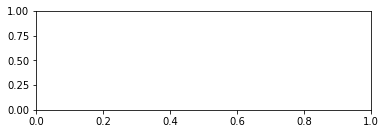

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

The __Axes__ is the plotting area into which most of the objects go, and __the Axes has many special helper methods__ (``plot(), text(), hist(), imshow()``) to create the most common graphics primitives (``Line2D, Text, Rectangle, Image``, respectively). These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested

__To create an Axes at an arbitrary location__, simply use the add_axes() method which takes a list of [left, bottom, width, height] values in 0-1 relative figure coordinates

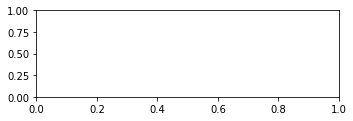

In [2]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

In [45]:
import numpy as np
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

In [46]:
ax.lines[0]

In [47]:
line

The call ax.plot, it creates a Line2D instance and adds it to the Axes.lines list. You can remove lines later simply by calling the list methods

In [8]:
del ax.lines[0]
#ax.lines.remove(line)  # one or the other, not both!

The Axes also has helper methods to configure and decorate the x-axis and y-axis tick, tick labels and axis labels:

In [50]:
xtext = ax.set_xlabel('my xdata') # returns a Text instance
ytext = ax.set_ylabel('my ydata')

The call ax.set_xlabel, it passes the information on the Text instance of the XAxis. Each Axes instance contains an XAxis and a YAxis instance, which handle the layout and drawing of the ticks, tick labels and axis labels.`

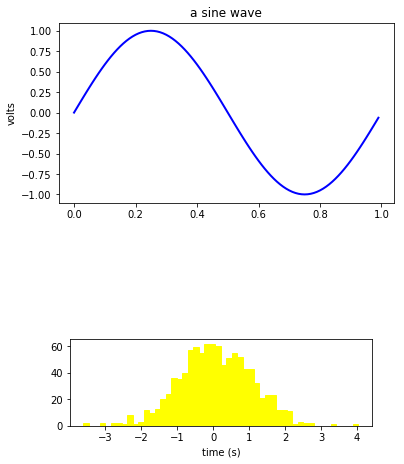

In [55]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(top=1.5)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')

plt.show()

### Customizing your objects

Every element in the figure is represented by a matplotlib Artist, and each has an extensive list of properties to configure its appearance

The figure itself contains a Rectangle exactly the size of the figure, which you can use to set the background color and transparency of the figures. Likewise, each Axes bounding box (the standard white box with black edges in the typical matplotlib plot, has a Rectangle instance that determines the color, transparency, and other properties of the Axes. These instances are stored as member variables Figure.patch and Axes.patch

|Property|Description|
| :- |------------- | 
|alpha|The transparency - a scalar from 0-1|
|animated|A boolean that is used to facilitate animated drawing|
|axes|The axes that the Artist lives in, possibly None|
|clip_box|The bounding box that clips the Artist|
|clip_on|Whether clipping is enabled|
|clip_path|The path the artist is clipped to|
|contains|A picking function to test whether the artist contains the pick point|
|figure|The figure instance the artist lives in, possibly None|
|label|A text label (e.g., for auto-labeling)|
|picker|A python object that controls object picking|
|transform|The transformation|
|visible|A boolean whether the artist should be drawn|
|zorder|A number which determines the drawing order|
|rasterized|Boolean; Turns vectors into raster graphics (for compression & eps tr|


Each of the properties is accessed with an old-fashioned setter or getter

In [63]:
a = fig.get_alpha()
print(a)
print(fig.set_alpha(0.5*a))

0.25
None


If you want to set a number of properties at once, you can also use the set method with keyword arguments. For example:

In [64]:
fig.set(alpha=0.5, zorder=2)

[None, None]

matplotlib.artist.getp() function (simply getp() in pyplot), which lists the properties and their values. Here are the Figure rectangle properties mentioned above:

In [65]:
from matplotlib.artist import getp
getp(fig.patch)

    agg_filter = None
    alpha = None
    animated = False
    antialiased = False
    bbox = Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0)
    capstyle = butt
    children = []
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_transform = BboxTransformTo(     TransformedBbox(         Bbox...
    edgecolor = (1.0, 1.0, 1.0, 0.0)
    extents = Bbox(x0=0.0, y0=0.0, x1=432.0, y1=288.0)
    facecolor = (1.0, 1.0, 1.0, 0.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1
    in_layout = True
    joinstyle = miter
    label = 
    linestyle = solid
    linewidth = 0.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None
    snap = None
    transform = CompositeGenericTransform(     CompositeGenericTra...
    transformed_clip_path_and_affine = (No

### Object containers

The primitives are usually the things you want to configure (the font of a Text instance, the width of a Line2D) although the containers also have some properties as well -- for example the Axes Artist is a container that contains many of the primitives in your plot, but it also has properties like the xscale to control whether the xaxis is 'linear' or 'log'. In this section we'll review where the various container objects store the Artists that you want to get at.

#### Figure container

The top level container Artist is the matplotlib.figure.Figure, and it contains everything in the figure. The background of the figure is a Rectangle which is stored in Figure.patch. As you add subplots (add_subplot()) and axes (add_axes()) to the figure these will be appended to the Figure.axes. These are also returned by the methods that create them:

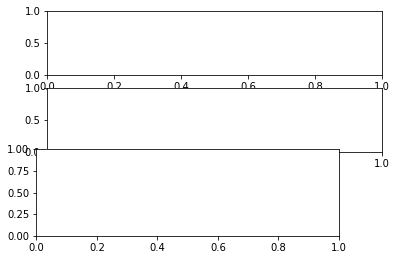

In [95]:
fig = plt.figure()
ax1 = plt.subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_axes([0.1, 0.1, 0.7, 0.3])

In [96]:
ax2

In [97]:
fig.axes

In [98]:
fig.patch

In [99]:
ax = fig.gca()
ax.plot([1,2,3])
plt.show()
ax

In [100]:
fig.sca(ax1)

In [101]:
fig.delaxes(ax2)

In [102]:
fig.axes

 You should not insert or remove axes directly from the axes list, but rather use the add_subplot() and add_axes() methods to insert, and the delaxes() method to delete. You are free however, to iterate over the list of axes or index into it to get access to Axes instances you want to customize. Here is an example which turns all the axes grids on:

In [103]:
for ax in fig.axes:
    ax.grid(True)

The figure also has its own text, lines, patches and images, which you can use to add primitives directly. __The default coordinate system for the Figure will simply be in pixels (which is not usually what you want) but you can control this by setting the transform property of the Artist you are adding to the figure.__

#### More useful is "figure coordinates" where (0, 0) is the bottom-left of the figure and (1, 1) is the top-right of the figure which you can obtain by setting the Artist transform to fig.transFigure:

In [106]:
import matplotlib.lines as lines

fig = plt.figure()

l1 = lines.Line2D([0, 1], [0, 1],figure=fig)
fig.lines.extend([l1])
plt.show()

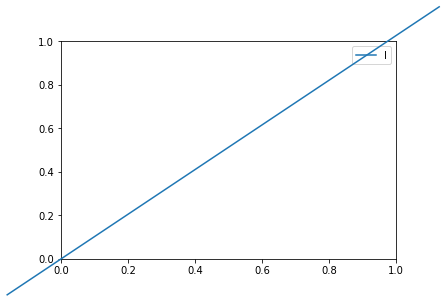

In [118]:
import matplotlib.lines as lines

fig = plt.figure()

l1 = lines.Line2D([0, 1], [0, 1],figure=fig, transform=fig.transFigure)
fig.lines.extend([l1])
plt.legend(fig.lines, ('line one'))
plt.show()

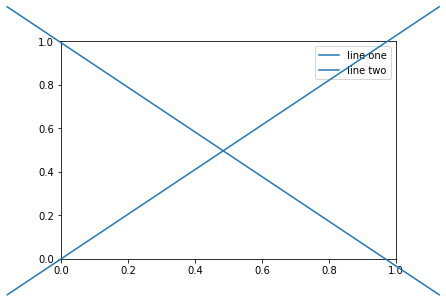

In [116]:
import matplotlib.lines as lines

fig = plt.figure()

l1 = lines.Line2D([0, 1], [0, 1],figure=fig, transform=fig.transFigure)
l2 = lines.Line2D([1, 0], [0, 1],figure=fig, transform=fig.transFigure)
fig.lines.extend([l1,l2])
plt.legend(fig.lines, ('line one','line two'))
plt.show()

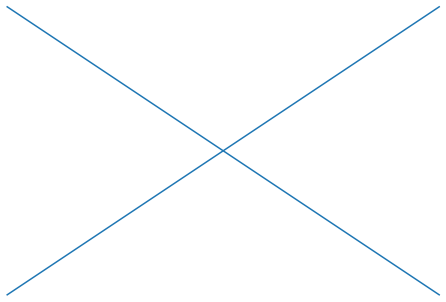

In [119]:
import matplotlib.lines as lines

fig = plt.figure()

l1 = lines.Line2D([0, 1], [0, 1],figure=fig, transform=fig.transFigure)
l2 = lines.Line2D([1, 0], [0, 1],figure=fig, transform=fig.transFigure)
fig.lines.extend([l1,l2])
plt.show()

Here is a summary of the Artists the figure contains

|Figure attribute|Description|
|-----|-----|
|axes|A list of Axes instances (includes Subplot)|
|patch|The Rectangle background|
|images|A list of FigureImages patches - useful for raw pixel display|
|legends|A list of Figure Legend instanes (different from Axes.legends)|
|lines|A list of Figure Line2D instances (rarely used, see Axes.lines)|
|patches|A list of Figure patches (rarely used, see Axes.patches)|
|texts|A list Figure Text instances|


### Axes container

The matplotlib.axes.Axes is the center of the matplotlib universe -- it contains the vast majority of all the Artists used in a figure with many helper methods to create and add these Artists to itself, as well as helper methods to access and customize the Artists it contains. Like the Figure, it contains a Patch patch which is a Rectangle for Cartesian coordinates and a Circle for polar coordinates; this patch determines the shape, background and border of the plotting region:

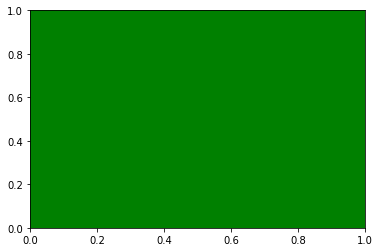

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch  # a Rectangle instance
rect.set_facecolor('green')
plt.show()

<Figure size 432x288 with 0 Axes>

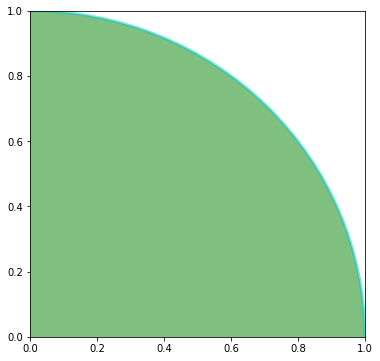

In [145]:
from matplotlib.patches import Circle
fig = plt.figure()
fig, ax = plt.subplots(figsize=(6, 6))
circle = Circle((0, 0), 1, facecolor='green', edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)
plt.show()

the call to __plot()__ and pass in arrays or lists of values will create a matplotlib.lines.Line2D() instance, update the line with all the Line2D properties passed as keyword arguments, __add the line to the Axes.lines container__ and retur the lines

In [146]:
x, y = np.random.rand(2, 100)
line, = ax.plot(x, y, '-', color='blue', linewidth=2)
line

In [147]:
ax.lines

plot returns a list of lines because you can pass in multiple x, y pairs to plot, and we are unpacking the first element of the length one list into the line variable

 #### bar() creates a list of rectangles, will add the patches to the Axes.patches list:

In [148]:
data = np.random.randn(1000)
n, bins, rectangles = ax.hist(data, 50, facecolor='yellow')
rectangles

<a list of 50 Patch objects>

In [149]:
print(len(ax.patches))

51


In [150]:
n

array([ 1.,  1.,  0.,  0.,  1.,  4.,  3., 12.,  6.,  9., 15.,  9., 19.,
       19., 24., 34., 32., 20., 48., 43., 47., 48., 53., 52., 46., 61.,
       51., 44., 43., 39., 31., 34., 20., 26., 24., 15., 17., 11.,  8.,
        8.,  5.,  5.,  1.,  6.,  3.,  0.,  0.,  1.,  0.,  1.])

In [151]:
bins

array([-3.02929801, -2.90549244, -2.78168687, -2.6578813 , -2.53407573,
       -2.41027016, -2.28646458, -2.16265901, -2.03885344, -1.91504787,
       -1.7912423 , -1.66743673, -1.54363116, -1.41982559, -1.29602002,
       -1.17221445, -1.04840888, -0.92460331, -0.80079774, -0.67699217,
       -0.55318659, -0.42938102, -0.30557545, -0.18176988, -0.05796431,
        0.06584126,  0.18964683,  0.3134524 ,  0.43725797,  0.56106354,
        0.68486911,  0.80867468,  0.93248025,  1.05628582,  1.1800914 ,
        1.30389697,  1.42770254,  1.55150811,  1.67531368,  1.79911925,
        1.92292482,  2.04673039,  2.17053596,  2.29434153,  2.4181471 ,
        2.54195267,  2.66575824,  2.78956382,  2.91336939,  3.03717496,
        3.16098053])

In [152]:
data

array([-1.06270306e+00,  1.20543254e+00, -9.08010364e-01,  8.68181516e-01,
        1.32040879e-01,  8.45755845e-01,  1.30292410e+00, -1.91418444e+00,
       -1.58856638e+00,  1.23903235e-01, -1.39569718e-01, -6.99730350e-01,
        5.72718948e-01, -7.82804657e-01,  1.18898764e+00, -2.05110844e-01,
       -3.02929801e+00,  7.95758373e-01,  4.84878414e-01,  2.58924791e-01,
        6.00036397e-01, -3.61458831e-01,  6.92986546e-01,  7.06705141e-01,
        5.09976376e-01,  6.32639445e-01, -1.10689678e+00, -7.02639373e-01,
       -5.08095394e-01, -2.51752445e-01, -1.07659585e+00, -1.24660787e+00,
        9.56637066e-01, -7.68265858e-01,  1.13741918e+00,  1.26200788e+00,
       -3.63461653e-01, -1.85276829e+00, -1.28482953e+00, -4.93902494e-01,
        1.64408625e+00, -1.44210620e+00,  7.93033772e-01,  5.60869119e-01,
       -3.03643327e-01, -2.05604041e+00,  3.90472014e-01,  3.74969591e-01,
       -1.04283833e+00, -3.77203174e-01, -1.16234682e+00,  5.47238742e-01,
       -7.91578443e-01, -

None
CompositeGenericTransform(
    BboxTransformTo(
        Bbox(x0=1.0, y0=1.0, x1=6.0, y1=13.0)),
    Affine2D(
        [[1. 0. 0.]
         [0. 1. 0.]
         [0. 0. 1.]]))
AxesSubplot(0.125,0.125;0.775x0.755)
CompositeGenericTransform(
    CompositeGenericTransform(
        BboxTransformTo(
            Bbox(x0=1.0, y0=1.0, x1=6.0, y1=13.0)),
        Affine2D(
            [[1. 0. 0.]
             [0. 1. 0.]
             [0. 0. 1.]])),
    CompositeGenericTransform(
        TransformWrapper(
            BlendedAffine2D(
                IdentityTransform(),
                IdentityTransform())),
        CompositeGenericTransform(
            BboxTransformFrom(
                TransformedBbox(
                    Bbox(x0=0.0, y0=0.0, x1=1.0, y1=1.0),
                    TransformWrapper(
                        BlendedAffine2D(
                            IdentityTransform(),
                            IdentityTransform())))),
            BboxTransformTo(
                Transformed

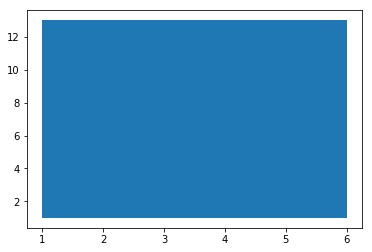

In [160]:
import matplotlib
fig, ax = plt.subplots()

# create a rectangle instance
rect = matplotlib.patches.Rectangle( (1,1), width=5, height=12)

# by default the axes instance is None
#print(rect.get_axes())
print(rect.axes)
#None

# and the transformation instance is set to the "identity transform"
print(rect.get_transform())
#<Affine object at 0x13695544>

# now we add the Rectangle to the Axes
ax.add_patch(rect)

# and notice that the ax.add_patch method has set the axes
# instance
print(rect.axes)
#Axes(0.125,0.1;0.775x0.8)

# and the transformation has been set too
print(rect.get_transform())
#<Affine object at 0x15009ca4>

# the default axes transformation is ax.transData
print(ax.transData)
#<Affine object at 0x15009ca4>

# notice that the xlimits of the Axes have not been changed
print(ax.get_xlim())
#(0.0, 1.0)

# but the data limits have been updated to encompass the rectangle
print(ax.dataLim.bounds)
#(1.0, 1.0, 5.0, 12.0)

# we can manually invoke the auto-scaling machinery
ax.autoscale_view()

# and now the xlim are updated to encompass the rectangle
print(ax.get_xlim())
#(1.0, 6.0)

# we have to manually force a figure draw
ax.figure.canvas.draw()

There are many, many Axes helper methods for creating primitive Artists and adding them to their respective containers. The table below summarizes a small sampling of them, the kinds of Artist they create, and where they store them

|Helper method	| Artist	| Container
|---|----|----
| ax.annotate | text annotations	Annotate	| ax.texts
| ax.bar | bar charts	Rectangle	| ax.patches
| ax.errorbar | error bar plots	Line2D and Rectangle	| ax.lines and | ax.patches
| ax.fill | shared area	Polygon	| ax.patches
| ax.hist | histograms	Rectangle	| ax.patches
| ax.imshow | image data	AxesImage	| ax.images
| ax.legend | axes legends	Legend	| ax.legends
| ax.plot | xy plots	Line2D	| ax.lines
| ax.scatter | scatter charts	PolygonCollection	| ax.collections
| ax.text | text	Text	| ax.texts

In addition to all of these Artists, the Axes contains two important Artist containers: __the XAxis and YAxis containers__, which handle the drawing of the ticks and labels. These are stored as instance variables xaxis and yaxis.

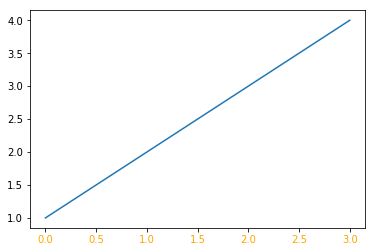

In [169]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4])
for label in ax.get_xticklabels():
    label.set_color('orange')
plt.show()        

Below is a summary of the Artists that the Axes contains

| Axes attribute	| Description
|----|---|
| artists	| A list of Artist instances
| patch	| Rectangle instance for Axes background
| collections	| A list of Collection instances
| images	| A list of AxesImage
| legends	| A list of Legend instances
| lines	| A list of Line2D instances
| patches	| A list of Patch instances
| texts	| A list of Text instances
| xaxis	| matplotlib.axis.XAxis instance
| yaxis	| matplotlib.axis.YAxis instance

### Axis containers

The matplotlib.axis.Axis instances handle the drawing of the tick lines, the grid lines, the tick labels and the axis label. You can configure the left and right ticks separately for the y-axis, and the upper and lower ticks separately for the x-axis. The Axis also stores the data and view intervals used in auto-scaling, panning and zooming, as well as the Locator and Formatter instances which control where the ticks are placed and how they are represented as strings.

Each Axis object __contains a label attribute__ (this is what pyplot modifies in calls to __xlabel() and ylabel()__) as well as a list of major and minor ticks. The ticks are __XTick and YTick__ instances, which contain the actual line and text primitives that render the ticks and ticklabels. You can access the lists of major and minor ticks through their accessor methods ``get_major_ticks() and get_minor_ticks()``

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

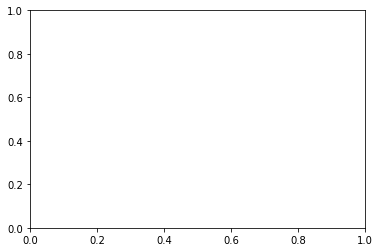

In [170]:
fig, ax = plt.subplots()
axis = ax.xaxis
axis.get_ticklocs()

In [174]:
axis.get_ticklabels()

<a list of 6 Text major ticklabel objects>

In [175]:
axis.get_ticklabels(minor=True)

<a list of 0 Text minor ticklabel objects>

> #### Note: there are twice as many ticklines as labels because by default there are tick lines at the top and bottom but only tick labels below the xaxis; this can be customized

#### by default you get the major ticks back

In [172]:
axis.get_ticklines() # tick lines = 2* tick lables

<a list of 12 Line2D ticklines objects>

In [173]:
axis.get_ticklines(minor=True) #but you can also ask for the minor ticks

<a list of 0 Line2D ticklines objects>

| Accessor method         | Description
|----|----|              
| get_scale               | The scale of the axis, e.g., 'log' or 'linear'
| get_view_interval       | The interval instance of the axis view limits
| get_data_interval       | The interval instance of the axis data limits
| get_gridlines           | A list of grid lines for the Axis
| get_label               | The axis label - a Text instance
| get_ticklabels          | A list of Text instances - keyword minor=True|False
| get_ticklines           | A list of Line2D instances - keyword minor=True|False
| get_ticklocs            | A list of Tick locations - keyword minor=True|False
| get_major_locator       | The matplotlib.ticker.Locator instance for major ticks
| get_major_formatter     | The matplotlib.ticker.Formatter instance for major ticks
| get_minor_locator       | The matplotlib.ticker.Locator instance for minor ticks
| get_minor_formatter     | The matplotlib.ticker.Formatter instance for minor ticks
| get_major_ticks         | A list of Tick instances for major ticks
| get_minor_ticks         | A list of Tick instances for minor ticks
| grid                    | Turn the grid on or off for the major or minor ticks

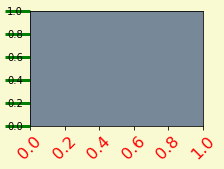

In [176]:
fig = plt.figure()
rect = fig.patch  # a rectangle instance
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4])
rect = ax1.patch
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels():
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

for line in ax1.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('green')
    line.set_markersize(25)
    line.set_markeredgewidth(3)

plt.show()

### Tick containers

The matplotlib.axis.Tick is the final container object in our descent from the Figure to the Axes to the Axis to the Tick. The Tick contains the tick and grid line instances, as well as the label instances for the upper and lower ticks. Each of these is accessible directly as an attribute of the Tick.

|Tick attribute	|Description
|---|---
|tick1line	|Line2D instance
|tick2line	|Line2D instance
|gridline	|Line2D instance
|label1		|Text instance
|label2		|Text instance

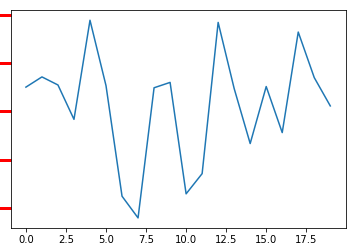

In [183]:
import matplotlib.ticker as ticker

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_visible(False) # disabled left side y label
    tick.label2.set_visible(True) #enabled rifht side y label
    tick.label2.set_color('green')
    tick.tick1line.set_color('red')
    tick.tick1line.set_markersize(25)
    tick.tick1line.set_markeredgewidth(3)
    tick.tick2line.set_color('green')
    tick.tick2line.set_markersize(25)
    tick.tick2line.set_markeredgewidth(3)

plt.show()